In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from plotly.offline import iplot
import cufflinks as cf
from sklearn.cluster import KMeans
import keras.backend as K
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
from keras import layers
from keras.utils import np_utils
import matplotlib.pyplot as plt


In [2]:
X = pd.read_csv('../data/single_cell.csv')
# X = pd.read_csv('../data/original.csv')

In [3]:
X.head()

,Unnamed: 0,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7,Gene8,Gene9,...,Gene192,Gene193,Gene194,Gene195,Gene196,Gene197,Gene198,Gene199,Gene200,group
0,Cell1,5.992481,8.637750,9.148508,0.000000,9.749526,NaN,0.000000,4.704148,11.965938,...,1.172069,2.861306,5.676206,7.064524,5.963797,6.387515,5.404645,5.811143,2.250973,Group1
1,Cell2,6.705927,8.459997,NaN,0.000000,9.613102,8.837886,NaN,4.354085,11.835529,...,0.000000,NaN,NaN,NaN,6.281317,6.541257,5.940163,5.120309,1.607604,Group4
2,Cell3,7.630381,NaN,NaN,0.000000,9.486118,8.731500,NaN,NaN,12.026917,...,0.000000,2.729572,NaN,8.092617,6.048260,6.878665,5.550450,5.957771,2.729572,Group4
3,Cell4,7.067631,8.952405,9.636137,2.034341,9.719746,7.529173,0.000000,NaN,12.129077,...,3.039986,2.623069,5.877711,7.349105,NaN,6.471351,6.568682,5.877711,2.846535,Group3
4,Cell5,5.732078,8.842180,NaN,2.192864,10.138186,7.676739,0.777724,4.987332,12.140196,...,NaN,NaN,5.111780,6.785379,5.567958,NaN,5.455013,5.770349,2.747472,Group1


In [4]:
X.shape

(100, 201)

In [5]:
y = X.group

In [6]:
y.head()

0    Group1
1    Group4
2    Group4
3    Group3
4    Group1
Name: group, dtype: object

In [7]:
dummy_y = pd.get_dummies(y)


encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)



In [8]:
dummy_y

,Group1,Group2,Group3,Group4
0,1,0,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
95,0,0,1,0
96,0,0,1,0
97,0,0,0,1
98,1,0,0,0


In [9]:
X = X.iloc[:,1:200]

In [10]:
X.head()

,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7,Gene8,Gene9,Gene10,...,Gene191,Gene192,Gene193,Gene194,Gene195,Gene196,Gene197,Gene198,Gene199,Gene200
0,5.992481,8.637750,9.148508,0.000000,9.749526,NaN,0.000000,4.704148,11.965938,8.347030,...,5.603690,1.172069,2.861306,5.676206,7.064524,5.963797,6.387515,5.404645,5.811143,2.250973
1,6.705927,8.459997,NaN,0.000000,9.613102,8.837886,NaN,4.354085,11.835529,7.964430,...,NaN,0.000000,NaN,NaN,NaN,6.281317,6.541257,5.940163,5.120309,1.607604
2,7.630381,NaN,NaN,0.000000,9.486118,8.731500,NaN,NaN,12.026917,8.264788,...,5.599159,0.000000,2.729572,NaN,8.092617,6.048260,6.878665,5.550450,5.957771,2.729572
3,7.067631,8.952405,9.636137,2.034341,9.719746,7.529173,0.000000,NaN,12.129077,9.857736,...,6.044907,3.039986,2.623069,5.877711,7.349105,NaN,6.471351,6.568682,5.877711,2.846535
4,5.732078,8.842180,NaN,2.192864,10.138186,7.676739,0.777724,4.987332,12.140196,8.067137,...,5.631711,NaN,NaN,5.111780,6.785379,5.567958,NaN,5.455013,5.770349,2.747472


In [11]:
type(X)

pandas.core.frame.DataFrame

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
X.shape

(100, 199)

In [14]:
lyrs = X.shape[1]
lyrs

199

In [15]:
x_train , x_test , y_train , y_test =train_test_split(X,
                        dummy_y,test_size =0.2, random_state=38)

In [16]:
x_train.shape

(80, 199)

In [17]:
X

array([[-1.698677  , -0.08650352, -0.0344896 , ..., -1.62587914,
         0.03998501,  0.09366341],
       [-0.30191298, -0.73504399,         nan, ..., -0.46921174,
        -1.08025797, -0.59033875],
       [ 1.50795369,         nan,         nan, ..., -1.31095373,
         0.27775481,  0.60248885],
       ...,
       [        nan, -1.09878257,  0.58340863, ...,         nan,
        -0.81417569,         nan],
       [-0.41719507,  0.68195198, -0.1589088 , ..., -0.11897133,
        -0.17606433,  0.89073287],
       [ 1.21470949,         nan, -0.72435217, ..., -0.97663199,
         0.06242718,  1.80700445]])

In [18]:
x_train

array([[ 1.12322895,  0.5999094 , -0.0578475 , ...,  1.19465288,
         1.70982064, -1.11438295],
       [-0.83957828, -2.23833239, -0.85965895, ..., -1.05662276,
                nan,         nan],
       [ 0.06043993,  2.02691073,  1.01131382, ...,  1.31239768,
         0.88001809,  1.55516322],
       ...,
       [ 0.82775591, -1.07252772, -1.50230366, ...,         nan,
        -0.59501369, -0.51541135],
       [ 0.86377549, -0.5906986 , -0.06624092, ..., -1.83338251,
        -1.05128337, -0.51182355],
       [ 1.13954856,  1.36095286, -1.0257393 , ...,  1.56996979,
         1.10145304, -0.25632689]])

In [19]:
# y_true = tf.constant([
#     [0.1, 1, np.nan, 0.5],
#     [0.4, 0.2, 0.8, 0],
#     [np.nan, 1.3, np.nan, 0.2],
#     [0.1, 0.1, 0.6, np.nan],
# ])

# y_pred = tf.constant([
#     [0.7, 0.7, 0.1, 0.3],
#     [0.6, 0.1, 0.1, 0],
#     [0.4, 0.9, 0.9, 0.2],
#     [0.1, 0.4, 0.4, 1.2],
# ])

#loss = na_custom_loss(y_true, y_pred)


In [20]:
# def na_custom_loss(y_true, y_pred):
#     y_true_mask = tf.where(tf.math.is_nan(y_true), tf.experimental.numpy.nanmean(y_true), y_true)
#     return K.categorical_crossentropy(y_pred, y_true_mask)

In [21]:
# Custom ReLu function which takes NA values
def relu_nan(x):
#     K.print_tensor(x, 'x relu start = ')
    x_true = tf.where(tf.math.is_nan(x), tf.zeros_like(x), x)
#     K.print_tensor(x_true, 'x_true relu = ')
    return K.relu(x_true, max_value=None)

In [22]:
# Custom softmax function which takes NA values
def soft_nan(x):
#     K.print_tensor(x, 'x softmax start = ')
    x_true = tf.where(tf.math.is_nan(x), tf.zeros_like(x), x)
#     K.print_tensor(x_true, 'x_true softmax = ')
    return tf.keras.activations.softmax(x_true)

In [23]:
# def custom_loss(y_true, y_pred):
#     K.print_tensor(y_true, 'y_true start = ')
#     K.print_tensor(y_pred, 'y_pred start = ')
#     y_true = tf.cast(y_true, y_pred.dtype)
#     K.print_tensor(y_true, 'y_true cast = ')
#     mask = tf.math.logical_not(tf.math.is_nan(y_true))
#     y_true = tf.boolean_mask(y_true, mask)
#     y_pred = tf.boolean_mask(y_pred, mask)
#     K.print_tensor(y_true, 'y_true after = ')    
#     K.print_tensor(y_pred, 'y_pred after = ')
#     loss = tf.keras.losses.mean_squared_error(y_true, y_pred)
#     return loss

In [24]:
def custom_loss(y_true, y_pred):
#     K.print_tensor(y_true, 'y_true start = ')
#     K.print_tensor(y_pred, 'y_pred start = ')
    y_true = tf.cast(y_true, y_pred.dtype)
#     K.print_tensor(y_true, 'y_true cast = ')
    y_true_mask = tf.where(tf.math.is_nan(y_true), \
                           tf.experimental.numpy.nanmean(y_true), y_true)
#     K.print_tensor(y_true, 'y_true after = ')    
#     K.print_tensor(y_pred, 'y_pred after = ')
#     K.print_tensor(y_true_mask, 'y_true_mask after = ')
    loss = tf.keras.losses.categorical_crossentropy(y_true_mask, y_pred)
    return loss

In [25]:
# ls = custom_loss(y_true, y_pred)

In [26]:
# K.print_tensor(ls)

In [74]:
def mask_nan(x):
    return tf.where(tf.math.is_nan(x), \
                           tf.experimental.numpy.nanmean(x), x)

In [75]:
def prt_mdl(model):
    inp = model.input                                           # input placeholder
    outputs = [layer.output for layer in model.layers]          # all layer outputs
    functors = [K.function([inp, K.learning_phase()], [out]) for out in outputs]    # evaluation functions

    # Testing
#     test = np.random.random(input_shape)[np.newaxis,...]
    layer_outs = [func([test, 1.]) for func in functors]
    print (layer_outs)

In [102]:
model = Sequential()
model.add(layers.Lambda(mask_nan))
model.add(Dense(units=199, activation='relu')) # add layers to neural network
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=4, activation='softmax'))
model.compile(loss= 'mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
        # adjusted learning rate. Trial and error to get value
# early_stop = EarlyStopping(monitor='val_loss',
#     mode='min',
#     verbose=1,
#     patience=500)
history = model.fit(x=x_train,
    y=y_train,
    epochs=50,
    batch_size = 32,
    validation_data=(x_test, y_test),
    verbose=1)#,
#     callbacks=[early_stop]
#         )

Epoch 1/50
3/3 [==============================] - 2s 275ms/step - loss: 0.1019 - val_loss: 0.0054
Epoch 2/50
3/3 [==============================] - 0s 65ms/step - loss: 7.7460e-06 - val_loss: 9.8760e-04
Epoch 3/50
3/3 [==============================] - 0s 61ms/step - loss: 3.7172e-07 - val_loss: 1.8001e-04
Epoch 4/50
3/3 [==============================] - 0s 62ms/step - loss: 1.6336e-08 - val_loss: 3.7100e-05
Epoch 5/50
3/3 [==============================] - 0s 65ms/step - loss: 2.1974e-09 - val_loss: 1.0048e-05
Epoch 6/50
3/3 [==============================] - 0s 60ms/step - loss: 1.0045e-09 - val_loss: 3.6674e-06
Epoch 7/50
3/3 [==============================] - 0s 58ms/step - loss: 4.0782e-10 - val_loss: 1.6422e-06
Epoch 8/50
3/3 [==============================] - 0s 57ms/step - loss: 2.4766e-10 - val_loss: 8.9294e-07
Epoch 9/50
3/3 [==============================] - 0s 60ms/step - loss: 1.4140e-10 - val_loss: 5.6197e-07
Epoch 10/50
3/3 [==============================] - 0s 62ms/ste

In [103]:
x_train

array([[ 1.12322895,  0.5999094 , -0.0578475 , ...,  1.19465288,
         1.70982064, -1.11438295],
       [-0.83957828, -2.23833239, -0.85965895, ..., -1.05662276,
                nan,         nan],
       [ 0.06043993,  2.02691073,  1.01131382, ...,  1.31239768,
         0.88001809,  1.55516322],
       ...,
       [ 0.82775591, -1.07252772, -1.50230366, ...,         nan,
        -0.59501369, -0.51541135],
       [ 0.86377549, -0.5906986 , -0.06624092, ..., -1.83338251,
        -1.05128337, -0.51182355],
       [ 1.13954856,  1.36095286, -1.0257393 , ...,  1.56996979,
         1.10145304, -0.25632689]])

In [104]:
preds = model.predict(x_test)
preds

1/1 [==============================] - 0s 243ms/step


array([[1.9693364e-14, 9.9999994e-01, 7.5139325e-13, 5.9042979e-11],
       [8.1714502e-16, 5.4086558e-13, 9.9999994e-01, 1.7930210e-12],
       [1.2084799e-19, 1.0132780e-16, 9.9999994e-01, 1.0767624e-16],
       [9.9999994e-01, 1.1508455e-19, 4.0465142e-11, 5.7149536e-18],
       [8.6745875e-20, 1.2899317e-22, 1.3480202e-23, 9.9999994e-01],
       [9.9999994e-01, 3.1560456e-20, 3.8742586e-12, 2.0652781e-16],
       [4.9215172e-14, 9.9999994e-01, 6.2409879e-15, 4.5844092e-11],
       [7.5123262e-11, 9.9999875e-01, 4.6642600e-11, 1.2062482e-06],
       [8.9750829e-10, 9.9943292e-01, 4.7184003e-06, 5.6233216e-04],
       [7.7454620e-16, 8.1529678e-13, 9.9999994e-01, 1.1016441e-11],
       [1.8508998e-17, 4.3804507e-19, 9.9999994e-01, 4.2115959e-18],
       [9.9999994e-01, 1.7763419e-19, 4.1576660e-14, 4.0478315e-16],
       [2.8984425e-17, 7.8293025e-21, 9.8900987e-23, 9.9999994e-01],
       [9.9999994e-01, 2.2212875e-17, 2.2689246e-10, 2.5495667e-17],
       [5.0270751e-21, 6.0260355e-

In [105]:
preds = np.ndarray.round(preds,0)

print(preds)
print(classification_report(preds, y_test))

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20
 samples avg       1.00      1.00      1.00        20



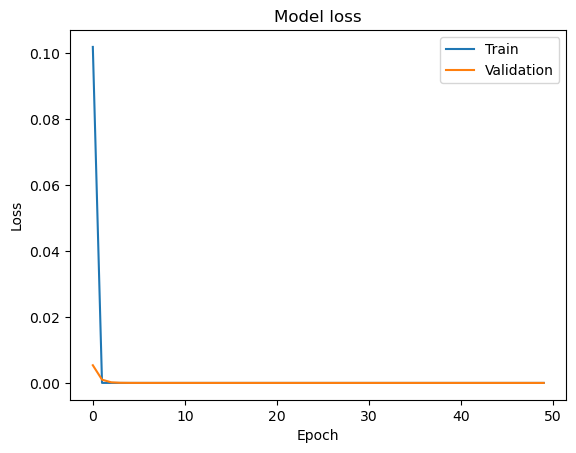

In [106]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [107]:
latent_space = 2

In [108]:
X.shape

(100, 199)

In [109]:
x_decoded = X
x_decoded = np.where(np.isnan(x_decoded), np.nanmean(x_decoded, axis=0), x_decoded)

In [133]:
latent_dim = 2 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
          layers.Lambda(mask_nan),
          layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(lyrs, activation='sigmoid')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)
autoencoder2 = Autoencoder(latent_dim)

In [134]:
autoencoder.compile(optimizer='adam', loss= 'mse')
autoencoder.fit(X, x_decoded,
                epochs=50,
                shuffle=True,
                validation_split = 0.2)

Epoch 1/50
3/3 [==============================] - 2s 279ms/step - loss: 1.1171 - val_loss: 1.0369
Epoch 2/50
3/3 [==============================] - 0s 61ms/step - loss: 1.1154 - val_loss: 1.0357
Epoch 3/50
3/3 [==============================] - 0s 64ms/step - loss: 1.1138 - val_loss: 1.0345
Epoch 4/50
3/3 [==============================] - 0s 64ms/step - loss: 1.1123 - val_loss: 1.0333
Epoch 5/50
3/3 [==============================] - 0s 61ms/step - loss: 1.1107 - val_loss: 1.0321
Epoch 6/50
3/3 [==============================] - 0s 62ms/step - loss: 1.1092 - val_loss: 1.0309
Epoch 7/50
3/3 [==============================] - 0s 58ms/step - loss: 1.1075 - val_loss: 1.0297
Epoch 8/50
3/3 [==============================] - 0s 60ms/step - loss: 1.1058 - val_loss: 1.0285
Epoch 9/50
3/3 [==============================] - 0s 60ms/step - loss: 1.1040 - val_loss: 1.0272
Epoch 10/50
3/3 [==============================] - 0s 62ms/step - loss: 1.1021 - val_loss: 1.0259
Epoch 11/50
3/3 [===========

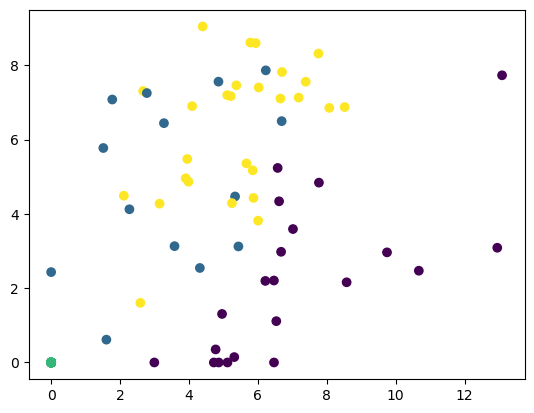

In [135]:
embeddings = autoencoder.encoder(X)
plt.scatter(embeddings[:,0], embeddings[:,1], c = y)
plt.show()

In [136]:
autoencoder2.compile(optimizer='adam', loss= 'mse')
autoencoder2.fit(x_decoded, x_decoded,
                epochs=50,
                shuffle=True,
                validation_split = 0.2)

Epoch 1/50
3/3 [==============================] - 2s 277ms/step - loss: 1.1161 - val_loss: 1.0379
Epoch 2/50
3/3 [==============================] - 0s 61ms/step - loss: 1.1145 - val_loss: 1.0365
Epoch 3/50
3/3 [==============================] - 0s 65ms/step - loss: 1.1130 - val_loss: 1.0352
Epoch 4/50
3/3 [==============================] - 0s 62ms/step - loss: 1.1115 - val_loss: 1.0339
Epoch 5/50
3/3 [==============================] - 0s 62ms/step - loss: 1.1100 - val_loss: 1.0326
Epoch 6/50
3/3 [==============================] - 0s 62ms/step - loss: 1.1085 - val_loss: 1.0313
Epoch 7/50
3/3 [==============================] - 0s 62ms/step - loss: 1.1070 - val_loss: 1.0300
Epoch 8/50
3/3 [==============================] - 0s 63ms/step - loss: 1.1053 - val_loss: 1.0286
Epoch 9/50
3/3 [==============================] - 0s 63ms/step - loss: 1.1035 - val_loss: 1.0272
Epoch 10/50
3/3 [==============================] - 0s 68ms/step - loss: 1.1018 - val_loss: 1.0256
Epoch 11/50
3/3 [===========

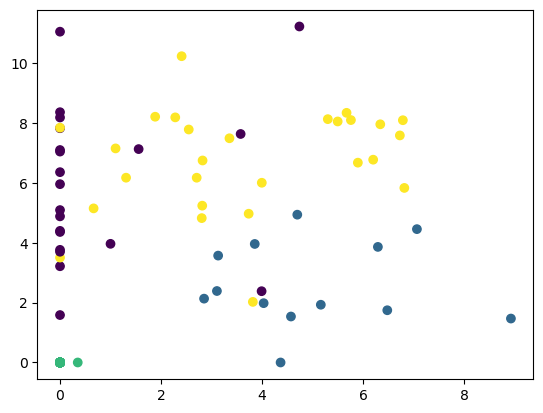

In [137]:
embeddings = autoencoder2.encoder(X)
plt.scatter(embeddings[:,0], embeddings[:,1], c = y)
plt.show()